## Calcolo della precessione dell'orbita di Venere.

Venere è il secondo pianeta del Sistema Solare in ordine di distanza dal Sole. Come tutti i pianeti del Sistema Solare risente dell'attrazzione gravitazionale dovuta alla grande massa del Sole. Come tutti sanno, questa attrazzione gravitazionale ne caratterizza il periodo e il cammino di rivoluzione attorno al Sole. Col fine di arrivare a  calcolare la precessione dell'orbita nel campo gravitazionale del Sole causata dalla correzione relativistica, verrà in primis calcolata con un modello computazionale l'orbita e l' eccentricità nel potenziale gravitazionale normale. L'equazione che governa i moti gravitazionali normali è : $F=G\tfrac{mM}{r^2}$
Il tutto verrà messo a confronto con Mercurio.

tau,Tmax,Tmax/T,N
0.0001 2.46 4.0 24600
Asse maggiore= 0.723
Periodo Anni= 0.615
Eccentricità Venere= 0.006915629322268333


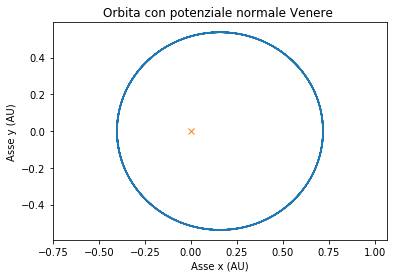

tau,Tmax,Tmax/T,N
0.001 0.964 4.0 964
Asse maggiore= 0.387
Periodo Anni= 0.241
eccentricità Mercurio= 0.214470284237726


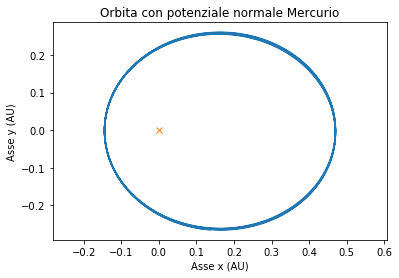

In [35]:
from pylab import *      #librerie
from numpy import *
              ###Venere con potenziale normale###
#Ora verranno inserite le costanti del moto.
T=0.615                           #periodo in anni
rp=0.718                          #Perielio in UA                                
vguess=2*pi                       #Velocità di fuga del pianeta                                      
a=0.723                           #Semiasse Maggiore UA
k=4                               #N° di Rivoluzioni
Tmax=k*T      
tau=0.0001                        #Time step
N=int(Tmax/tau)
print ('tau,Tmax,Tmax/T,N')
print (tau,Tmax,Tmax/T,N)
GM=4*pi**2                   
print ('Asse maggiore=',a)
print ('Periodo Anni=',T)

ion()           
x=zeros(N)                      #Definizione delle variabili in gioco.
vx=zeros(N)
y=zeros(N)
t=zeros(N)
rs=zeros(N)
vy=zeros(N)
ep=zeros(N)
ek=zeros(N)
                #Condizioni iniziali delle variabili.
xd=rp                           #Posizione di partenza nell'asse x
yd=0.                           #Posizione di partenza nell'asse y
vxd=0.                          #Velocità di partenza rispetto a x
vyd=vguess                      #Velocità di partenza rispetto a y


r=sqrt(xd**2+yd**2)             #Distanza dal sole
Fxd=-GM*xd/r**3                 #Componente x della forza
Fyd=-GM*yd/r**3                 #Componente y della forza

#Ciclo temporale in range (N)
for tstep in range(N):
    t[tstep] = tau*tstep
    x[tstep] = xd
    y[tstep] = yd
    vx[tstep] = vxd
    vy[tstep] = vyd
    xd += vxd*tau + 0.5*tau*tau*Fxd
    yd += vyd*tau + 0.5*tau*tau*Fyd
    r = sqrt(xd**2+yd**2)
    rs[tstep] = r
    Fxd2 = -GM*xd/r**3
    Fyd2 = -GM*yd/r**3
    vxd += 0.5*tau*(Fxd+Fxd2)
    vyd += 0.5*tau*(Fyd+Fyd2)
    Fxd=Fxd2
    Fyd=Fyd2
    
e=abs(a-rp)/a                 #Formula per il calcolo dell'eccentricità
print ('Eccentricità Venere=',e)


figure(1)
title('Orbita con potenziale normale Venere ')
xlabel('Asse x (AU)')
ylabel ('Asse y (AU)')
plot(x,y)
x0=0.;y0=0.
axis('equal')
plot(x0,y0,'x')
show()


              ###Mercurio con potenziale normale####
T=0.241                          #periodo in anni
rp=0.47                          #Perielio in UA                                       
vguess=2*pi                                          
a=0.387                          #Asse Maggiore
k=4                     
Tmax=k*T
tau=0.001
N=int(Tmax/tau)
print ('tau,Tmax,Tmax/T,N')
print (tau,Tmax,Tmax/T,N)
GM=4*pi**2
print ('Asse maggiore=',a)
print ('Periodo Anni=',T)
                            #Definizione delle variabili
ion()
x=zeros(N)    # init
vx=zeros(N)
y=zeros(N)
t=zeros(N)
rs=zeros(N)
vy=zeros(N)
ep=zeros(N)
ek=zeros(N)
                       #Condizioni Iniziali
xd=rp
yd=0.
vxd=0.
vyd=vguess
                   
                         #Distanza e componenti delle forze
r=sqrt(xd**2+yd**2)           
Fxd=-GM*xd/r**3
Fyd=-GM*yd/r**3                              
                        ##Solito ciclo temporale
for tstep in range(N):
    t[tstep] = tau*tstep
    x[tstep] = xd
    y[tstep] = yd
    vx[tstep] = vxd
    vy[tstep] = vyd
    xd += vxd*tau + 0.5*tau*tau*Fxd
    yd += vyd*tau + 0.5*tau*tau*Fyd
    r = sqrt(xd**2+yd**2)
    rs[tstep] = r
    Fxd2 = -GM*xd/r**3
    Fyd2 = -GM*yd/r**3
    vxd += 0.5*tau*(Fxd+Fxd2)
    vyd += 0.5*tau*(Fyd+Fyd2)
    Fxd=Fxd2
    Fyd=Fyd2
    
ec=abs(a-rp)/a                         #Calcolo dell'eccentricità con valore assoluto della differenza
print ('eccentricità Mercurio=',ec)

figure(1)                             ## Grafico dell'orbita
title('Orbita con potenziale normale Mercurio')
xlabel('Asse x (AU)')
ylabel ('Asse y (AU)')
plot(x,y)
x0=0.;y0=0.
axis('equal')
plot(x0,y0,'x')
show()

Si noti come l'eccentricità dell'orbita di Mercurio è molto più grande rispetto a quella di Venere, ciò implica che l'orbita di Mercurio sarà più schiacciata rispetto a quella di Venere.  Il punto all centro dell'orbita rappresenta la posizione del Sole.

### Orbita di Venere con correzione relativistica con alfa fissato

Ora verrà calcolata l'orbita e l'eccentricità di Venere con la correzione relativistica e verrà messa a confronto con Mercurio.
La cosidetta correzione relativistica è una correzione fatta da Einstein alle leggi che Newton e Keplero scrissero per il moto dei pianeti. Einstein inserendo il cosidetto parametro correttivo alfa, riusci a risolvere il problema del calcolo del periodo e della precessione di Mercurio.
La formula dell'attrazzione gravitazione con la correzione relativistica è : $F=crel*G\tfrac{mM}{r^2}$
con crel=correzione relativistica= $\tfrac{1+\alpha}{r^2}$


tau,Tmax,Tmax/T,N
0.0001 2.46 4.0 24600
Asse maggiore= 0.723
Periodo Anni= 0.615
keplero 3: anno^2/a^3=1.0 ==> 0.461550826244
a(1+e)= 2.6883177619758896
Tmax= 5.89003526185 anni del pianeta


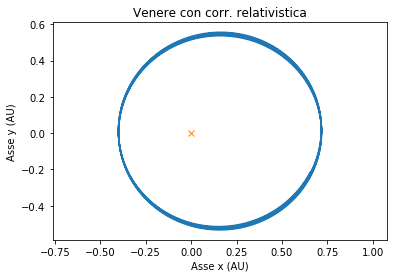

tau,Tmax,Tmax/T,N
0.001 0.964 4.0 964
Asse maggiore= 0.387
Periodo Anni= 0.241
keplero 3: anno^2/a^3=1.0 ==> 0.491176611154
a(1+e)= 1.4389750676136506
Tmax= 5.71336206897 anni del pianeta


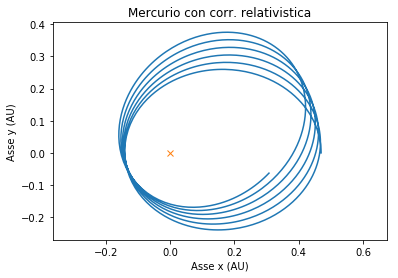

In [11]:
from pylab import *      #librerie
from numpy import *
              ###Venere con correzione relativistica ###
#Ora verranno inserite le costanti del moto.
T=0.615                           #periodo in anni
rp=0.718                          #Perielio in UA                                
vguess=2*pi                       #Velocità di fuga del pianeta                                      
a=0.723                           #Semiasse Maggiore UA
k=4                               #N° di Rivoluzioni
Tmax=k*T      
tau=0.0001                        #Time step
N=int(Tmax/tau)
print ('tau,Tmax,Tmax/T,N')
print (tau,Tmax,Tmax/T,N)
GM=4*pi**2                   
print ('Asse maggiore=',a)
print ('Periodo Anni=',T)

ion()               #Definizione delle variabili
x=zeros(N)    
vx=zeros(N)
y=zeros(N)
t=zeros(N)
rs=zeros(N)
vy=zeros(N)
ep=zeros(N)
ek=zeros(N)
                          ##Condizioni Iniziali
xd=rp
yd=0.
vxd=0.
vyd=vguess

alfa=0.001               ##Parametro di correzione relativistica
r=sqrt(xd**2+yd**2)       #Distanza
crel=(1.0 + alfa/r**2)      ##Correzione Relativistica
Fxd=-crel*GM*xd/r**3         ##Componenti delle Forze con corr. rel.
Fyd=-crel*GM*yd/r**3
                            ##Solito time loop, ma con con correzzione relativistica
for tstep in range(N):
    t[tstep] = tau*tstep
    x[tstep] = xd
    y[tstep] = yd
    vx[tstep] = vxd
    vy[tstep] = vyd
    xd += vxd*tau + 0.5*tau*tau*Fxd
    yd += vyd*tau + 0.5*tau*tau*Fyd
    r = sqrt(xd**2+yd**2)
    crel=(1.0 + alfa/r**2)
    rs[tstep] = r
    Fxd2 = -crel*GM*xd/r**3
    Fyd2 = -crel*GM*yd/r**3
    vxd += 0.5*tau*(Fxd+Fxd2)
    vyd += 0.5*tau*(Fyd+Fyd2)
    Fxd=Fxd2
    Fyd=Fyd2
    
                      
chsg=[]
for i in range(len(y)-1):
    if (y[i]*y[i+1]<=0):
        chsg.append(i)
                                   
per=[]
for i in range(len(chsg)-1):
    per.append(2.*(t[chsg[i+1]]-t[chsg[i]]))   

anno=mean(per) 
print ('keplero 3: anno^2/a^3=1.0 ==>',anno**2/a**3)      ###Costante K inserita nella terza Legge di Keplero
print ('a(1+e)=',a*(1+e))         
print ('Tmax=',Tmax/anno,'anni del pianeta')

figure(1)
title('Venere con corr. relativistica')          ##Grafico dell'orbita
xlabel('Asse x (AU)')
ylabel ('Asse y (AU)')
plot(x,y,'-')
axis('equal')
plot(x0,y0,'x')
show()

                       ####Orbita di Mercurio con correzione relativistica###
T=0.241                          #periodo in anni
rp=0.47                          #Perielio in UA                                       
vguess=2*pi                                          
a=0.387                          #Asse Maggiore
k=4                     
Tmax=k*T
tau=0.001
N=int(Tmax/tau)
print ('tau,Tmax,Tmax/T,N')
print (tau,Tmax,Tmax/T,N)
GM=4*pi**2
print ('Asse maggiore=',a)
print ('Periodo Anni=',T)
                            #Definizione delle variabili
ion()
x=zeros(N)    
vx=zeros(N)
y=zeros(N)
t=zeros(N)
rs=zeros(N)
vy=zeros(N)
ep=zeros(N)
ek=zeros(N)
                      ##Condizioni iniziali delle variabili
xd=rp      
yd=0.
vxd=0.
vyd=vguess

alfa=0.001
r=sqrt(xd**2+yd**2)
crel=(1.0 + alfa/r**2)
Fxd=-crel*GM*xd/r**3
Fyd=-crel*GM*yd/r**3
       
for tstep in range(N):                  ####Solito ciclo temporale
    t[tstep] = tau*tstep
    x[tstep] = xd
    y[tstep] = yd
    vx[tstep] = vxd
    vy[tstep] = vyd
    xd += vxd*tau + 0.5*tau*tau*Fxd
    yd += vyd*tau + 0.5*tau*tau*Fyd
    r = sqrt(xd**2+yd**2)
    crel=(1.0 + alfa/r**2)
    rs[tstep] = r
    Fxd2 = -crel*GM*xd/r**3
    Fyd2 = -crel*GM*yd/r**3
    vxd += 0.5*tau*(Fxd+Fxd2)
    vyd += 0.5*tau*(Fyd+Fyd2)
    Fxd=Fxd2
    Fyd=Fyd2
    
chsg=[]
for i in range(len(y)-1):
    if (y[i]*y[i+1]<=0):
        chsg.append(i)
                                   
per=[]
for i in range(len(chsg)-1):
    per.append(2.*(t[chsg[i+1]]-t[chsg[i]]))   

anno=mean(per) 
print ('keplero 3: anno^2/a^3=1.0 ==>',anno**2/a**3)      ###Costante K inserita nella terza Legge di Keplero
print ('a(1+e)=',a*(1+e))         
print ('Tmax=',Tmax/anno,'anni del pianeta')

figure(1)
title('Mercurio con corr. relativistica')          ##Grafico dell'orbita
xlabel('Asse x (AU)')
ylabel ('Asse y (AU)')
plot(x,y,'-')
axis('equal')
plot(x0,y0,'x')
show()

Si noti come il parametro di correzzione relativistica per l'orbita di Mercurio ne caratteriza la famosa precessione del perielio. Mentre per Venere di può notare come l'orbita non cambi poi così tanto. Si nota una leggera precessione.

## Orbita di Venere e Mercurio con correzione relativistica. Alfa diversi.

In questa parte del programma verranno calcolate varie orbite di Venere e Mercurio con valori di alfa diversi.Per fare ciò verranno inserite le costanti, le variabili e le componenti delle forze all'interno di un ciclo in alfa. 

alfa= 0.001


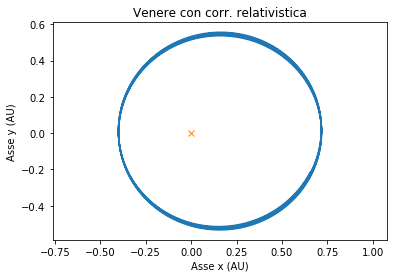

alfa= 0.002


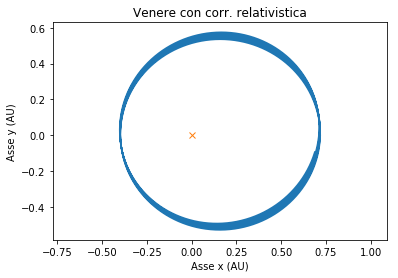

alfa= 0.003


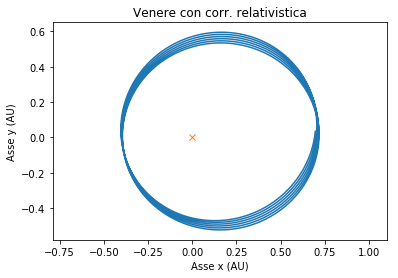

alfa= 0.004


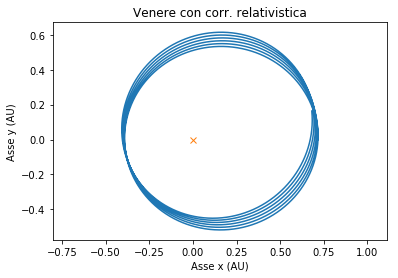

alfa= 0.005


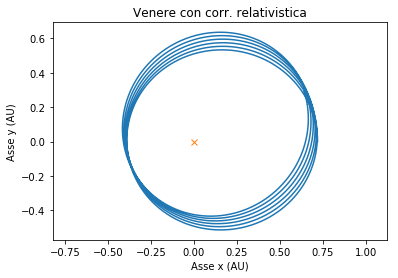

alfa= 0.001


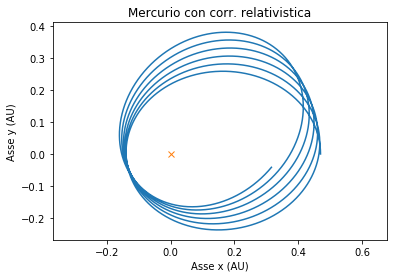

alfa= 0.002


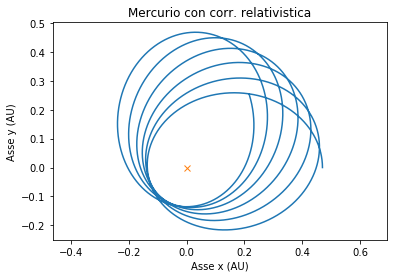

alfa= 0.003


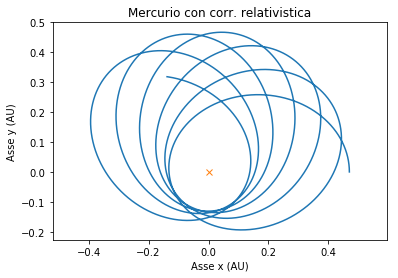

In [28]:
from pylab import *

Na=5                      ## Numero di Alfa
alf=zeros(Na)             ##Definizione della variabile 
da=0.001                 ## Valori di alfa che vanno a sommarsi nel ciclo
a0=0.001                ##Valore di alfa inziale


for ia in range(Na):        ## Ciclo su alfa con costanti e condizioni iniziali fissate.

    alf[ia]= a0 + da*ia     ##Ci dice come varierà alfa all'interno del ciclo
    T=0.615                 #Costanti del moto
    rp=0.718  
    vguess=2*pi 
    Rm=1.    # rapporto maassa pianeti
    k=4
    Tmax=k*T
    tau=0.0001
    N=int(Tmax/tau)

    GM=4*pi**2
    
    ion()                 ## Definizione delle variabili
    x=zeros(N)    
    vx=zeros(N)
    y=zeros(N)
    t=zeros(N)
    rs=zeros(N)
    vy=zeros(N)
    ep=zeros(N)
    ek=zeros(N)
                        ##Condizioni iniali
    xd=rp
    yd=0.
    vxd=0.
    vyd=vguess
    
    alfa=alf[ia]           ##Gli alfa che verranno inseriti nelle forze varieranno comw il ciclo ia
    r=sqrt(xd**2+yd**2)
    crel=(1.0 + alfa/r**2)
    Fxd=-crel*GM*xd/r**3
    Fyd=-crel*GM*yd/r**3

    
    for tstep in range(N):        #loop temporale inserito dentro il ciclo di alfa
        t[tstep] = tstep*tau
        x[tstep] = xd
        vx[tstep] = vxd
        y[tstep] = yd
        vy[tstep] = vyd
        ek[tstep] = vxd**2+vyd**2
        ep[tstep] = -GM*Rm/r
        xd+=(vxd+0.5*Fxd*tau)*tau
        yd+=(vyd+0.5*Fyd*tau)*tau
        r=sqrt(xd**2+yd**2)
        rs[tstep]=r
        crel=(1.0 + alfa/r**2)
        Fxd2=-crel*GM*xd/r**3
        Fyd2=-crel*GM*yd/r**3
        vxd+=0.5*tau*(Fxd2+Fxd)
        vyd+=0.5*tau*(Fyd2+Fyd)
        Fxd=Fxd2
        Fyd=Fyd2

    print('alfa=',alfa)        
    figure(2)
    title('Venere con corr. relativistica')
    xlabel('Asse x (AU)')
    ylabel ('Asse y (AU)')
    plot(x,y,'-')
    plot(x0,y0,'x')
    axis('equal')

    show()

    
    ##### Orbita di Mercurio con alfa diversi
    

Na=3                          ##N° di alfa che variano per Mercurio
alf=zeros(Na)
da=0.001
a0=0.001

for ia in range(Na):

    alf[ia]= a0 + da*ia
    T=0.241    
    rp=0.47  
    vguess=2*pi 
    Rm=1.    
    k=4
    Tmax=k*T
    tau=0.0001
    N=int(Tmax/tau)

    GM=4*pi**2
    
    ion()
    x=zeros(N)    # init
    vx=zeros(N)
    y=zeros(N)
    t=zeros(N)
    rs=zeros(N)
    vy=zeros(N)
    ep=zeros(N)
    ek=zeros(N)
    
    xd=rp
    yd=0.
    vxd=0.
    vyd=vguess
    
    alfa=alf[ia]
    r=sqrt(xd**2+yd**2)
    crel=(1.0 + alfa/r**2)
    Fxd=-crel*GM*xd/r**3
    Fyd=-crel*GM*yd/r**3

    
    for tstep in range(N):        #loop temporale
        t[tstep] = tstep*tau
        x[tstep] = xd
        vx[tstep] = vxd
        y[tstep] = yd
        vy[tstep] = vyd
        ek[tstep] = vxd**2+vyd**2
        ep[tstep] = -GM*Rm/r
        xd+=(vxd+0.5*Fxd*tau)*tau
        yd+=(vyd+0.5*Fyd*tau)*tau
        r=sqrt(xd**2+yd**2)
        rs[tstep]=r
        crel=(1.0 + alfa/r**2)
        Fxd2=-crel*GM*xd/r**3
        Fyd2=-crel*GM*yd/r**3
        vxd+=0.5*tau*(Fxd2+Fxd)
        vyd+=0.5*tau*(Fyd2+Fyd)
        Fxd=Fxd2
        Fyd=Fyd2

    print('alfa=',alfa)        
    figure(2)
    title('Mercurio con corr. relativistica')
    xlabel('Asse x (AU)')
    ylabel ('Asse y (AU)')
    plot(x,y,'-')
    plot(x0,y0,'x')
    axis('equal')

    show()

Si noti come man mano che il parametro di correzione relativistica aumenta la precessione dell'orbita degenera.

## Precessione e parametri annessi al variare di alfa per Venere

All'interno di questa parte del programma verranno calcolati parametri legati alla precessione del pianeta e la precessione stessa. Verrà costruito un grafico in cui comparirà la variazione dell'angolo spazzato dall'orbita in funzione del tempo e un grafico in cui comparirà la variazione $\tfrac{d^2\theta}{dt^2}d\alpha$ in funzione della variazione di alfa. Tutto questo verrà fatto con una velocità di fuga fissata. Verrà inserito un ciclo su alfa. In questa parte la precessione dell'angolo verrà calcolata utilizzando l'arccos. Mentre nella parte successica l'arctang. Nel caso di Venere, la precessione non cambia se calcolato con la tangente o con il coseno.

alfa= 0.0
fit theta(t)=> mt+q :m= 0.0364216207298 q= 0.023377262316
alfa= 0.001
fit theta(t)=> mt+q :m= 3.23972945866 q= -0.0197476995394
alfa= 0.002
fit theta(t)=> mt+q :m= 6.580610594 q= -0.0197311931973
alfa= 0.003
fit theta(t)=> mt+q :m= 10.0055822953 q= -0.0293832595034
alfa= 0.004
fit theta(t)=> mt+q :m= 13.5055847383 q= -0.0194658668206
alfa= 0.005
fit theta(t)=> mt+q :m= 17.071798516 q= -0.0193364038172
alfa= 0.006
fit theta(t)=> mt+q :m= 20.7537165758 q= -0.0192027413413
alfa= 0.007
fit theta(t)=> mt+q :m= 24.4849478136 q= -0.00952746154838
alfa= 0.008
fit theta(t)=> mt+q :m= 28.338045666 q= -0.00945428577649
alfa= 0.009
fit theta(t)=> mt+q :m= 32.2818939557 q= -0.0187529027566
fit prec(alfa): m*alfa+q: m= 3583.2107102 , q= -0.494615072506
Precession d2theta/dt dalfa Venere (deg/yr/alfa)=  3583.2107102
Precessione Venere (arcsec/century)=  14.1895144124


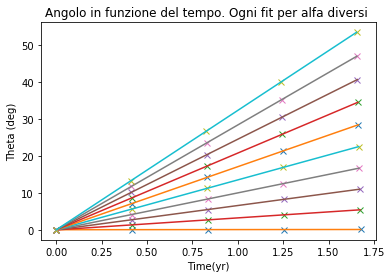

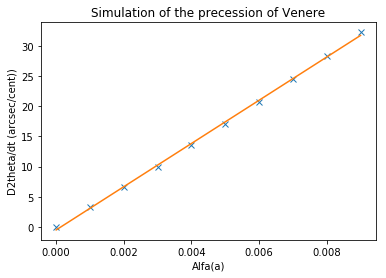

In [29]:
Na=10
alf=zeros(Na)
prec=zeros(Na)
prec2=zeros(Na)
prec3=zeros(Na)
da=0.001
a0=0.00
for ia in range(Na):

    alf[ia]= a0 + da*ia
    T=0.615  
    rp=0.718  
    vguess=2*pi 
    Rm=1.    
    k=3
    Tmax=k*T
    tau=0.0001
    N=int(Tmax/tau)
    GM=4*pi**2
    
    ion()
    x=zeros(N)    # init
    vx=zeros(N)
    y=zeros(N)
    t=zeros(N)
    rs=zeros(N)
    vy=zeros(N)
    ep=zeros(N)
    ek=zeros(N)
    
    xd=rp
    yd=0.
    vxd=0.
    vyd=vguess
    
    alfa=alf[ia]
    r=sqrt(xd**2+yd**2)
    crel=(1.0 + alfa/r**2)
    Fxd=-crel*GM*xd/r**3
    Fyd=-crel*GM*yd/r**3
    
    for tstep in range(N):        #loop
        t[tstep] = tstep*tau
        x[tstep] = xd
        vx[tstep] = vxd
        y[tstep] = yd
        vy[tstep] = vyd
        ek[tstep] = vxd**2+vyd**2
        ep[tstep] = -GM*Rm/r
        xd+=(vxd+0.5*Fxd*tau)*tau
        yd+=(vyd+0.5*Fyd*tau)*tau
        r=sqrt(xd**2+yd**2)
        rs[tstep]=r
        crel=(1.0 + alfa/r**2)
        Fxd2=-crel*GM*xd/r**3
        Fyd2=-crel*GM*yd/r**3
        vxd+=0.5*tau*(Fxd2+Fxd)
        vyd+=0.5*tau*(Fyd2+Fyd)
        Fxd=Fxd2
        Fyd=Fyd2

        
    tfit=[0.]       ##Array temporale da plottare
    angolo=[0.]     ##Array dell'angolo
    

    print;print ('alfa=',alf[ia])
    drr=diff(rs)/diff(t)                    ###Derivate 
    pos=0
    for j in range(len(y)-1):             ##Ciclo su segno di derivate
        segno=drr[j]*drr[j-1]
        if segno<0 and drr[j]<0:          ##Ciclo if su comportamento segno derivate
            tfit.append(t[j]) 
            angolo.append(arccos(x[j]/rs[j]))   ##append dei valori dell'angolo calcolati con arcocos
    angolo=rad2deg(angolo)                     
    m, b= polyfit(asarray(tfit), asarray(angolo), 1)    ##polyfit dei valori di tempo e angolo ploinomio grado 1
    
    print ('fit theta(t)=> mt+q :m=',m,'q=',b)
    plot(tfit,angolo,'x')                  ##plot dei punti nel grafico
    plot(tfit,m*asarray(tfit)+b)            ##retta che fitta i punti del grafico
    prec[ia]=m                             

figure (1)
title('Angolo in funzione del tempo. Ogni fit per alfa diversi ')
xlabel('Time(yr)')
ylabel ('Theta (deg)')

pr,prb = polyfit(alf,prec, 1)                            ##polyfit dei valori di precessione in funzione di alfa
print ('fit prec(alfa): m*alfa+q: m=', pr,', q=',prb)       ##print dei coefficienti della retta di fit

figure (2)
plot(alf,prec,'x') 
title( 'Simulation of the precession of Venere')
xlabel('Alfa(a)')  
ylabel ('D2theta/dt (arcsec/cent))')              #Figura 1 asse x > time asse > angoli ogni retta corr. ad a diversi
plot(alf,pr*alf+prb)                       #Figura 2 asse x > alfa, asse y > dtheta/dt


print ('Precession d2theta/dt dalfa Venere (deg/yr/alfa)= ',pr)      ##Precessione come d2theta/dt come angoli su anno per alfa
alfcalc=1.1e-8;secolo=100;deg2sec=3600.                       ##Conversione valori
cst=alfcalc*secolo*deg2sec
print ('Precessione Venere (arcsec/century)= ',pr*cst)               ##Precessione come Archi di secolo su anno. 


## Precessione in funzione di eccentricità con Velocità iniziali che cambiano per Venere

In questa parte del programma verrà fatta variare la velocità iniziale di Venere e all'interno di questo ciclo verrà inserito un ciclo che farà variare il parametro alfa. Verrà calcolata la variazione dell'angolo theta in funzione del tempo con velocità diverse, la variazione della precessione in funzione di alfa e l'eccentricità associata ad ogni velocità diversa. Infine verrà plottato un grafico in cui ci sarà la precessione in funzione dell'eccentricità.

a= 0.439055998119 Eccentricità al variare di vy0= 0.635326707763
v[ia]= 4.5
alfa= 0.0006
fit prec(alfa): m*alfa+q: m= 18065.2768442 , q= -0.0531561989433
Precession d2theta/dt dalfa (deg/yr/alfa)  18065.2768442
Precession (arcsec/century)  71.5384963031
Precession d2theta/dt dalfa (deg/yr/alfa)  0.000198718045286
a= 0.463778593774 Eccentricità al variare di vy0= 0.548152519292
v[ia]= 5.0
alfa= 0.0006
fit prec(alfa): m*alfa+q: m= 10837.5706124 , q= -0.0339348560199
Precession d2theta/dt dalfa (deg/yr/alfa)  10837.5706124
Precession (arcsec/century)  42.916779625
Precession d2theta/dt dalfa (deg/yr/alfa)  0.000119213276736
a= 0.494454191857 Eccentricità al variare di vy0= 0.452106204686
v[ia]= 5.5
alfa= 0.0006
fit prec(alfa): m*alfa+q: m= 6700.34252778 , q= -0.0210613948115
Precession d2theta/dt dalfa (deg/yr/alfa)  6700.34252778
Precession (arcsec/century)  26.53335641
Precession d2theta/dt dalfa (deg/yr/alfa)  7.37037678056e-05
a= 0.532990509287 Eccentricità al variare di vy0= 0.347115

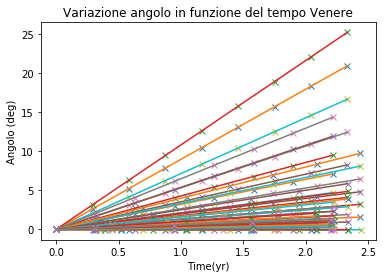

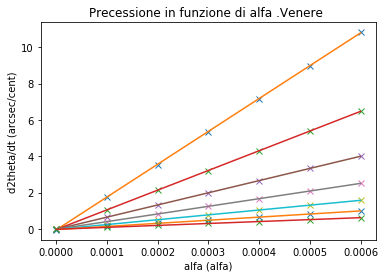

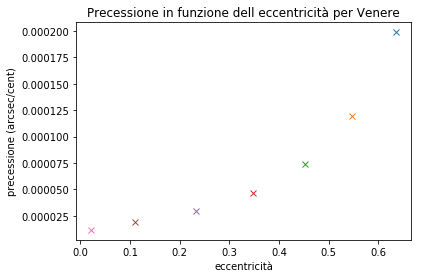

In [32]:
from numpy import *
from pylab import *
  
Na=7                         ##Numero di valori di velocità iniziali e di alfa nei cicli
v=zeros(Na)                   ##Definizione della variabile v
alf=zeros(Na)                 ##Definizione della variabile alfa
prec=zeros(Na)                 ##Definizione della variabile precessione
v0=4.5                          ##Velocità iniziale sul ciclo di V
da=0.0001                       ## Valori di alfa che andranno a sommarsi ad alfa0
a0=0.00
vstep=0.5                      ##Step di somma sulla velocità

for ia in range (Na):        ##Cicolo sulla velocità
    v[ia]=v0+(ia*vstep)      ##Operazione su V del ciclo

    for i in range(Na):      ##Ciclo su alfa interno al ciclo di V

        alf[i]= a0 + da*i
        T=0.615  
        rp=0.718  
        vguess=v[ia]          ##Velocità di fuga sul ciclo di alfa. Da notare che varia come il ciclo di V
        k=4
        Rm=1
        Tmax=k*T
        tau=0.0001
        N=int(Tmax/tau)

        GM=4*pi**2
    
        ion()                ##Definizione delle variabili del moto
        x=zeros(N)    
        vx=zeros(N)
        y=zeros(N)
        t=zeros(N)
        rs=zeros(N)
        vy=zeros(N)
        ep=zeros(N)
        ek=zeros(N)
    
        xd=rp
        yd=0.
        vxd=0.
        vyd=vguess
    
        alfa=alf[i]
        r=sqrt(xd**2+yd**2)
        crel=(1.0 + alfa/r**2)
        Fxd=-crel*GM*xd/r**3
        Fyd=-crel*GM*yd/r**3

    
        for tstep in range(N):        #loop temporale su ciclo di v e alfa
                t[tstep] = tstep*tau
                x[tstep] = xd
                vx[tstep] = vxd
                y[tstep] = yd
                vy[tstep] = vyd
                ek[tstep] = vxd**2+vyd**2
                ep[tstep] = -GM*Rm/r
                xd+=(vxd+0.5*Fxd*tau)*tau
                yd+=(vyd+0.5*Fyd*tau)*tau
                r=sqrt(xd**2+yd**2)
                rs[tstep]=r
                crel=(1.0 + alfa/r**2)
                Fxd2=-crel*GM*xd/r**3
                Fyd2=-crel*GM*yd/r**3
                vxd+=0.5*tau*(Fxd2+Fxd)
                vyd+=0.5*tau*(Fyd2+Fyd)
                Fxd=Fxd2
                Fyd=Fyd2

        a=0.5*abs((max(rs)+abs(min(rs))))       ##Asse maggiore calcolato come un mezzo del valore ass. del max e
                                                ##del min del perielio
   
        tfit=[0.]        ##array temporale 1D
        angolo=[0.]      ##array su angolo
        

    
        drr=diff(rs)/diff(t)         ##Derivate
        pos=0
        for j in range(len(y)-1):      ## Ciclo j su derivate
            segno=drr[j]*drr[j-1]
            if segno<0 and drr[j]<0:    ##Ciclo if su segno derivate
                tfit.append(t[j])
                angolo.append(arctan(y[j]/x[j]))       ##Angolo calcolato con arcotangente
            
        angolo=rad2deg(angolo)
        m, b= polyfit(asarray(tfit), asarray(angolo), 1)     ##Fit tempo e angolo con polinomio grado 1
        
        figure(1)                ##Grafico 1 della variazione dell'angolo in funzione del tempo
        title('Variazione angolo in funzione del tempo Venere')
        xlabel('Time(yr)')
        ylabel('Angolo (deg)')
        plot(tfit,angolo,'x')      ##Punti nel grafico
        plot(tfit,m*asarray(tfit)+b)       ##
        prec[i]=m
   
    e=1.0-abs(min(rs))/a       ##Calcolo eccentricità


    print ('a=',a,'Eccentricità al variare di vy0=',e)
    print ('v[ia]=',v[ia])
    print ('alfa=',alfa)
    
    pr,prb = polyfit(alf,prec, 1)            ##Fit precessione in funzione di alfa
    print ('fit prec(alfa): m*alfa+q: m=', pr,', q=',prb)

    figure(2)         ##Grafico della precessione in funzione di alfa
    title('Precessione in funzione di alfa .Venere ')
    xlabel('alfa (alfa)')
    ylabel('d2theta/dt (arcsec/cent)')
    plot(alf,prec,'x')                 ##  plot precessione in funzione di alfa                      
    plot(alf,pr*alf+prb)                       
    
    ath=1.1*10**-8       ###Termine di alfa teorico per precessione
    print ('Precession d2theta/dt dalfa (deg/yr/alfa) ',pr)    ##precessione come d2theta/dt dalfa 
    alfcalc=1.1e-8;secolo=100;deg2sec=3600.
    cst=alfcalc*secolo*deg2sec
    print ('Precession (arcsec/century) ',pr*cst)          ##precessione come arcodisecolo per secolo
    print ('Precession d2theta/dt dalfa*ath (deg/yr/alfa) ',pr*ath)     ##precessione scalata di alfa teorico
    
    ecc=asarray(e)          ##Valori dell'eccentricità come array
    pre=asarray(pr*ath)      ##Valori precessione come array
   
    figure (3)
    plot(ecc,pre,'x')  
    
    title('Precessione in funzione dell eccentricità per Venere')
    xlabel('eccentricità')
    ylabel ('precessione (arcsec/cent)')

Il grafico della precessione in funzione dell'eccentricità mostra come all'aumentare della velocità l'eccentricità diminuisce e anche la precessione diminuisce. Non si è riusciti a polyfittare il grafico di precessione in funzione di eccentricità per problemi con le dimensioni dell'array x.

Come sanity check sul ciclo, viene riprodotto un ciclo uguale ma su Mercurio.

a= 0.265433647971 Eccentricità al variare di vy0= 0.770687339356
v[ia]= 4.5
alfa= 0.0005
fit prec(alfa): m*alfa+q: m= 227854.898261 , q= -2.01385367802
Precession d2theta/dt dalfa (deg/yr/alfa)  227854.898261
Precession (arcsec/century)  902.305397114
Precession d2theta/dt dalfa (deg/yr/alfa)  0.00250640388087
a= 0.274611546433 Eccentricità al variare di vy0= 0.711508445769
v[ia]= 5.0
alfa= 0.0005
fit prec(alfa): m*alfa+q: m= 136416.423859 , q= -0.848059960378
Precession d2theta/dt dalfa (deg/yr/alfa)  136416.423859
Precession (arcsec/century)  540.209038483
Precession d2theta/dt dalfa (deg/yr/alfa)  0.00150058066245
a= 0.285339722177 Eccentricità al variare di vy0= 0.647159363871
v[ia]= 5.5
alfa= 0.0005
fit prec(alfa): m*alfa+q: m= 85944.4378423 , q= -0.423027373636
Precession d2theta/dt dalfa (deg/yr/alfa)  85944.4378423
Precession (arcsec/century)  340.339973855
Precession d2theta/dt dalfa (deg/yr/alfa)  0.000945388816265
a= 0.297967901204 Eccentricità al variare di vy0= 0.577351042

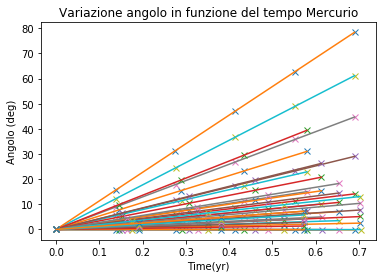

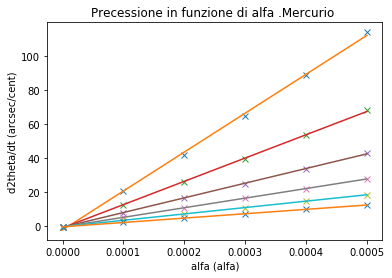

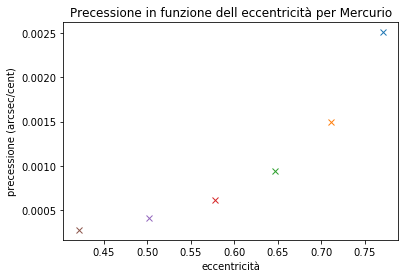

In [34]:
from numpy import *
from pylab import *
  
Na=6                        ##Numero di valori di velocità iniziali e di alfa nei cicli
v=zeros(Na)                   ##Definizione della variabile v
alf=zeros(Na)                 ##Definizione della variabile alfa
prec=zeros(Na)                 ##Definizione della variabile precessione
v0=4.5                          ##Velocità iniziale sul ciclo di V
da=0.0001                       ## Valori di alfa che andranno a sommarsi ad alfa0
a0=0.00
vstep=0.5                      ##Step di somma sulla velocità

for ia in range (Na):        ##Cicolo sulla velocità
    v[ia]=v0+(ia*vstep)      ##Operazione su V del ciclo

    for i in range(Na):      ##Ciclo su alfa interno al ciclo di V

        alf[i]= a0 + da*i
        T=0.241  
        rp=0.47  
        vguess=v[ia]          ##Velocità di fuga sul ciclo di alfa. Da notare che varia come il ciclo di V
        k=3
        Rm=1
        Tmax=k*T
        tau=0.0001
        N=int(Tmax/tau)

        GM=4*pi**2
    
        ion()                ##Definizione delle variabili del moto
        x=zeros(N)    
        vx=zeros(N)
        y=zeros(N)
        t=zeros(N)
        rs=zeros(N)
        vy=zeros(N)
        ep=zeros(N)
        ek=zeros(N)
    
        xd=rp
        yd=0.
        vxd=0.
        vyd=vguess
    
        alfa=alf[i]
        r=sqrt(xd**2+yd**2)
        crel=(1.0 + alfa/r**2)
        Fxd=-crel*GM*xd/r**3
        Fyd=-crel*GM*yd/r**3

    
        for tstep in range(N):        #loop temporale su ciclo di v e alfa
                t[tstep] = tstep*tau
                x[tstep] = xd
                vx[tstep] = vxd
                y[tstep] = yd
                vy[tstep] = vyd
                ek[tstep] = vxd**2+vyd**2
                ep[tstep] = -GM*Rm/r
                xd+=(vxd+0.5*Fxd*tau)*tau
                yd+=(vyd+0.5*Fyd*tau)*tau
                r=sqrt(xd**2+yd**2)
                rs[tstep]=r
                crel=(1.0 + alfa/r**2)
                Fxd2=-crel*GM*xd/r**3
                Fyd2=-crel*GM*yd/r**3
                vxd+=0.5*tau*(Fxd2+Fxd)
                vyd+=0.5*tau*(Fyd2+Fyd)
                Fxd=Fxd2
                Fyd=Fyd2

        a=0.5*abs((max(rs)+abs(min(rs))))       ##Asse maggiore calcolato come un mezzo del valore ass. del max e
                                                ##del min del perielio
   
        tfit=[0.]        ##array temporale 1D
        angolo=[0.]      ##array su angolo
        

    
        drr=diff(rs)/diff(t)         ##Derivate
        pos=0
        for j in range(len(y)-1):      ## Ciclo j su derivate
            segno=drr[j]*drr[j-1]
            if segno<0 and drr[j]<0:    ##Ciclo if su segno derivate
                tfit.append(t[j])
                angolo.append(arctan(y[j]/x[j]))       ##Angolo calcolato con arcotangente
            
        angolo=rad2deg(angolo)
        m, b= polyfit(asarray(tfit), asarray(angolo), 1)     ##Fit tempo e angolo con polinomio grado 1
        
        figure(1)                ##Grafico 1 della variazione dell'angolo in funzione del tempo
        title('Variazione angolo in funzione del tempo Mercurio')
        xlabel('Time(yr)')
        ylabel('Angolo (deg)')
        plot(tfit,angolo,'x')      ##Punti nel grafico
        plot(tfit,m*asarray(tfit)+b)       ##
        prec[i]=m
   
    e=1.0-abs(min(rs))/a       ##Calcolo eccentricità


    print ('a=',a,'Eccentricità al variare di vy0=',e)
    print ('v[ia]=',v[ia])
    print ('alfa=',alfa)
    
    pr,prb = polyfit(alf,prec, 1)            ##Fit precessione in funzione di alfa
    print ('fit prec(alfa): m*alfa+q: m=', pr,', q=',prb)

    figure(2)         ##Grafico della precessione in funzione di alfa
    title('Precessione in funzione di alfa .Mercurio ')
    xlabel('alfa (alfa)')
    ylabel('d2theta/dt (arcsec/cent)')
    plot(alf,prec,'x')                 ##  plot precessione in funzione di alfa                      
    plot(alf,pr*alf+prb)                       
    
    ath=1.1*10**-8       ###Termine di alfa teorico per precessione
    print ('Precession d2theta/dt dalfa (deg/yr/alfa) ',pr)    ##precessione come d2theta/dt dalfa 
    alfcalc=1.1e-8;secolo=100;deg2sec=3600.
    cst=alfcalc*secolo*deg2sec
    print ('Precession (arcsec/century) ',pr*cst)          ##precessione come arcodisecolo per secolo
    print ('Precession d2theta/dt dalfa (deg/yr/alfa) ',pr*ath)     ##precessione scalata di alfa teorico
    
    ecc=asarray(e)          ##Valori dell'eccentricità come array
    pre=asarray(pr*ath)      ##Valori precessione come array
   
    figure (3)
    plot(ecc,pre,'x')  
    
    title('Precessione in funzione dell eccentricità per Mercurio')
    xlabel('eccentricità')
    ylabel ('precessione (arcsec/cent)')

Si noti come per questo ciclo e il precedente è stata scelta una variazione di alfa molto piccola rispetto ai cicli precedenti. Si noti come per una velocità pari a circa 2 pigreco (6,5) e cioè la velocità che è stata impostata in tutti gli altri cicli, la precessione di mercurio si avvicina in modo consistente con 155 arcsec/sec.